# 🔗 Unit 2.3: Co-integration & Granger Causality

**Course:** Advanced Machine Learning (AICC 303)  
**Topic:** 2.2 Co-integration

Correlation $\ne$ Causation. In Time Series, we often find strong correlations between completely unrelated series (spurious correlation) just because they both trend upwards.

**Co-integration** offers a way to check if two non-stationary series share a common long-term relationship.

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, coint, grangercausalitytests

# Setup
sns.set(style="whitegrid")
np.random.seed(42)

# Helper function for stationarity test
def check_stationarity(series, name):
    result = adfuller(series)
    print(f'{name} - ADF Statistic: {result[0]:.4f}, p-value: {result[1]:.4f}')
    if result[1] <= 0.05:
        print("Is Stationary")
    else:
        print("Is Non-Stationary")

## 1. Spurious Correlation

Two random walks can appear highly correlated.
$$ X_t = X_{t-1} + \epsilon_x $$
$$ Y_t = Y_{t-1} + \epsilon_y $$

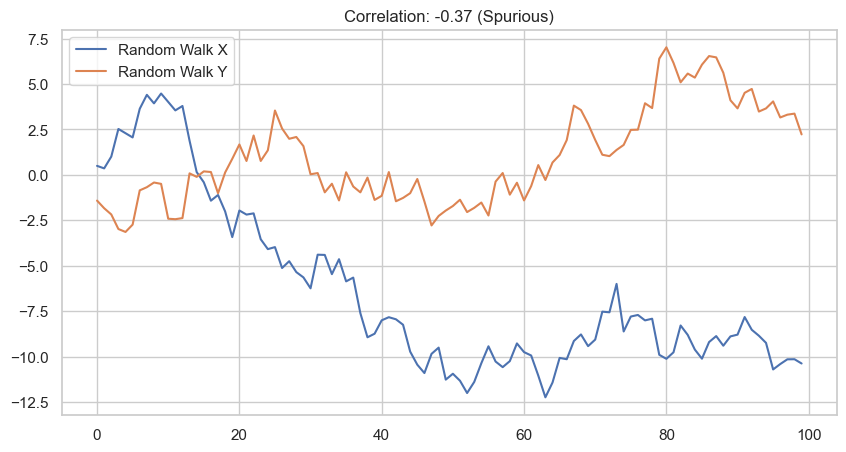

X - ADF Statistic: -1.3583, p-value: 0.6021
Is Non-Stationary
Y - ADF Statistic: -1.8976, p-value: 0.3332
Is Non-Stationary


In [2]:
# Generate two independent random walks
n = 100
x = np.cumsum(np.random.normal(0, 1, n))
y = np.cumsum(np.random.normal(0, 1, n))

plt.figure(figsize=(10, 5))
plt.plot(x, label='Random Walk X')
plt.plot(y, label='Random Walk Y')
plt.title(f"Correlation: {np.corrcoef(x, y)[0,1]:.2f} (Spurious)")
plt.legend()
plt.show()

check_stationarity(x, "X")
check_stationarity(y, "Y")

## 2. Co-integration

Two series $X_t$ and $Y_t$ are **co-integrated** if a linear combination of them is stationary.
$$ Y_t = \beta X_t + \epsilon_t $$
where $\epsilon_t$ is stationary.

This implies that while $X$ and $Y$ may wander around, they never explore too far from each other (like a drunk man walking a dog). 

**Engle-Granger Test:**
1.  Regress $Y$ on $X$ to get residuals.
2.  Test residuals for stationarity (ADF Test).
3.  If residuals are stationary $\to$ Co-integrated.

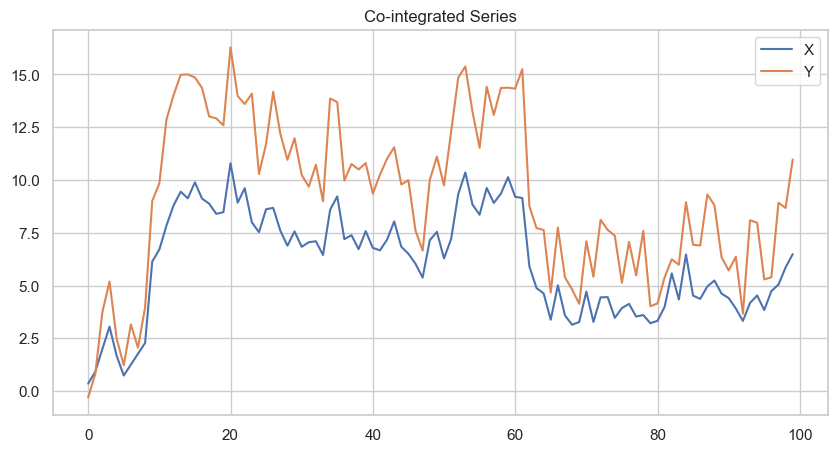

Cointegration Test p-value: 0.0000
Reject Null: Series are Co-integrated.


In [3]:
# Generate Co-integrated Data
# X is a random walk
X = np.cumsum(np.random.normal(0, 1, n))
# Y is linked to X plus some stationary noise
Y = 1.5 * X + np.random.normal(0, 1, n)

plt.figure(figsize=(10, 5))
plt.plot(X, label='X')
plt.plot(Y, label='Y')
plt.title("Co-integrated Series")
plt.legend()
plt.show()

# Test for Co-integration
# Null Hypothesis: No co-integration
score, pvalue, _ = coint(X, Y)
print(f"Cointegration Test p-value: {pvalue:.4f}")
if pvalue < 0.05:
    print("Reject Null: Series are Co-integrated.")
else:
    print("Fail to Reject Null: Series are NOT Co-integrated.")

## 3. Granger Causality

Does past $X$ help predict $Y$?
Granger causality tests if lags of $X$ are significant in a regression of $Y$.

In [4]:
data = pd.DataFrame({'Y': Y, 'X': X})
# maxlag=2
grangercausalitytests(data[['Y', 'X']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=17.0339 , p=0.0001  , df_denom=96, df_num=1
ssr based chi2 test:   chi2=17.5662 , p=0.0000  , df=1
likelihood ratio test: chi2=16.1706 , p=0.0001  , df=1
parameter F test:         F=17.0339 , p=0.0001  , df_denom=96, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.8605  , p=0.0007  , df_denom=93, df_num=2
ssr based chi2 test:   chi2=16.5661 , p=0.0003  , df=2
likelihood ratio test: chi2=15.3061 , p=0.0005  , df=2
parameter F test:         F=7.8605  , p=0.0007  , df_denom=93, df_num=2


{np.int64(1): ({'ssr_ftest': (np.float64(17.033891758912866),
    np.float64(7.824431870037451e-05),
    np.float64(96.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(17.566200876378893),
    np.float64(2.774765792294448e-05),
    np.int64(1)),
   'lrtest': (np.float64(16.170611425194295),
    np.float64(5.7885240136657736e-05),
    np.int64(1)),
   'params_ftest': (np.float64(17.033891758912848),
    np.float64(7.824431870037476e-05),
    np.float64(96.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(7.860451729489014),
    np.float64(0.0007012940563427367),
    np.float64(93.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(16.566113322363947),
    np.float64(0.00025276340593286933),
    np.int64(2)),
   'lrtest': (np.float64(15.306089488394605),
    np.float64(0.00047459690076073454),
    np.int64(2)),
   'params_ftest': (np.float64(7.860451729489),
    np.float64(0.0007012940563427453),
    np.float64(93.0),
    2.0)},
   array([[0., 0., 1